#### Adaptive Resonance Theory Based Image Compression

In [9]:
from PIL import Image
from ART import AdaptiveResonanceTheory, generate_test_data, complement_coding, create_contour_plot, preprocess_image, decode_compressed_image

In [2]:
# Open the image file
image = Image.open('./dataset/label.png')

# Preprocess the image
block_shape = (2, 2)
train_image, train_X, train_Y = preprocess_image(image, block_shape)

In [3]:
# Fit the fuzzy ART model
art = AdaptiveResonanceTheory(
    learning_rate=0.2, 
    alpha=1, 
    epsilon=0.9
    )
art.fit(train_X, train_Y)

Iteration 1: 16180 different clusters
Iteration 2: 8374 different clusters
Iteration 3: 5968 different clusters
Iteration 4: 4120 different clusters
Iteration 5: 6960 different clusters
Iteration 6: 592 different clusters
Iteration 7: 2962 different clusters
Iteration 8: 2168 different clusters
Iteration 9: 638 different clusters
Iteration 10: 92 different clusters
Iteration 11: 339 different clusters
Iteration 12: 54 different clusters
Iteration 13: 113 different clusters
Iteration 14: 29 different clusters
Iteration 15: 55 different clusters
Iteration 16: 93 different clusters
Iteration 17: 80 different clusters
Iteration 18: 116 different clusters
Iteration 19: 59 different clusters
Iteration 20: 14 different clusters
Iteration 21: 12 different clusters
Iteration 22: 32 different clusters
Iteration 23: 41 different clusters
Iteration 24: 2 different clusters
Iteration 25: 0 different clusters


In [7]:
# Decode the compressed image
compressed_image = decode_compressed_image(art, train_image, block_shape)

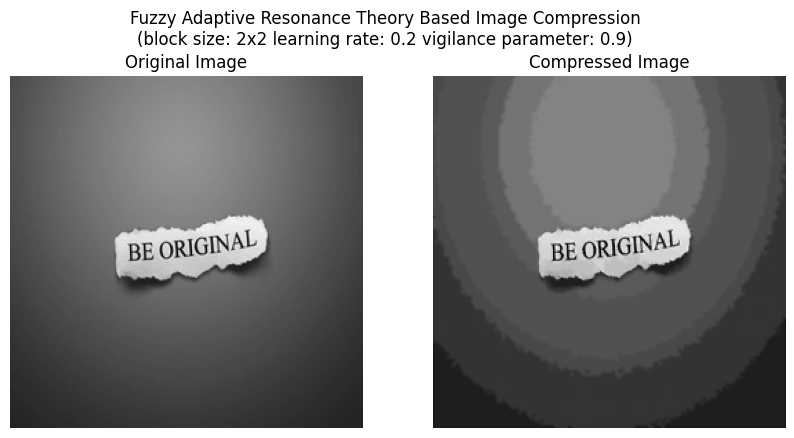

In [11]:
# Plot original image and compressed image
plt.figure(figsize=(10, 5))

# Create the first subplot for the original image
plt.subplot(1, 2, 1)
plt.imshow(train_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Create the second subplot for the compressed image
plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title("Compressed Image")
plt.axis('off')

plt.suptitle(f"Fuzzy Adaptive Resonance Theory Based Image Compression\n(block size: {block_shape[0]}x{block_shape[1]} learning rate: {art.learning_rate} vigilance parameter: {art.epsilon})")
plt.show()

In [12]:
# Compression ratio
compression_ratio = np.prod(train_image.shape) / (art.cluster_id.size+np.prod(trained_blocks.shape)) 

# MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(train_image * 255, compressed_image)

# Peak signal to noise ratio
psnr = 20 * np.log10(255.0 / np.sqrt(mse))
compression_ratio, mse, psnr

NameError: name 'np' is not defined

In [ ]:
difference = np.abs(train_image * 255 - compressed_image)
plt.imshow(difference, cmap='binary', interpolation='nearest')
plt.axis('off')

# Add a colorbar to the right side
colorbar = plt.colorbar(orientation='vertical', pad=0.02)
colorbar.set_label('Difference')

plt.title('Heatmap of compression difference')
plt.show()